In [1]:
import numpy as np
import scipy.ndimage
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def cv2_clipped_zoom(img, zoom_factor):
    """
    Center zoom in/out of the given image and returning an enlarged/shrinked view of 
    the image without changing dimensions
    Args:
        img : Image array
        zoom_factor : amount of zoom as a ratio (0 to Inf)
    """
    height, width = img.shape[:2] # It's also the final desired shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

    ### Crop only the part that will remain in the result (more efficient)
    # Centered bbox of the final desired size in resized (larger/smaller) image coordinates
    y1, x1 = max(0, new_height - height) // 2, max(0, new_width - width) // 2
    y2, x2 = y1 + height, x1 + width
    bbox = np.array([y1,x1,y2,x2])
    # Map back to original image coordinates
    bbox = (bbox / zoom_factor).astype(np.int)
    y1, x1, y2, x2 = bbox
    cropped_img = img[y1:y2, x1:x2]

    # Handle padding when downscaling
    resize_height, resize_width = min(new_height, height), min(new_width, width)
    pad_height1, pad_width1 = (height - resize_height) // 2, (width - resize_width) //2
    pad_height2, pad_width2 = (height - resize_height) - pad_height1, (width - resize_width) - pad_width1
    pad_spec = [(pad_height1, pad_height2), (pad_width1, pad_width2)] + [(0,0)] * (img.ndim - 2)

    result = cv2.resize(cropped_img, (resize_width, resize_height))
    result = np.pad(result, pad_spec, mode='constant')
    assert result.shape[0] == height and result.shape[1] == width
    return result

In [3]:
home = os.getcwd().split('AUT-CNN-TUB')[0]
canon_path  = os.path.join(home,'AUT-CNN-TUB/Data/AllParts')
industy_path  = os.path.join(home,'AUT-CNN-TUB/Data/AllParts_indu')

In [4]:
len(os.listdir(os.path.join(home,canon_path)))

22

In [24]:
img_name = os.listdir(os.path.join(home,canon_path))[10]
file_path = os.path.join(home,canon_path, img_name)
image = cv2.imread(file_path)

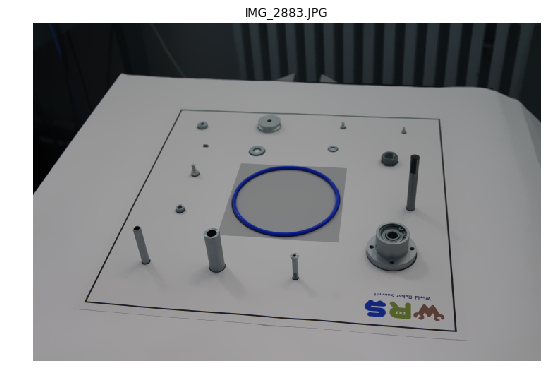

In [25]:
blurred = cv2.bilateralFilter(image,50, 10, 10)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred)
plt.show()

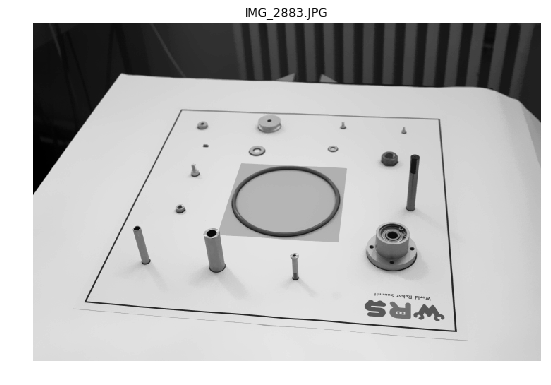

In [26]:
imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(imgray, cmap='gray')
plt.show()

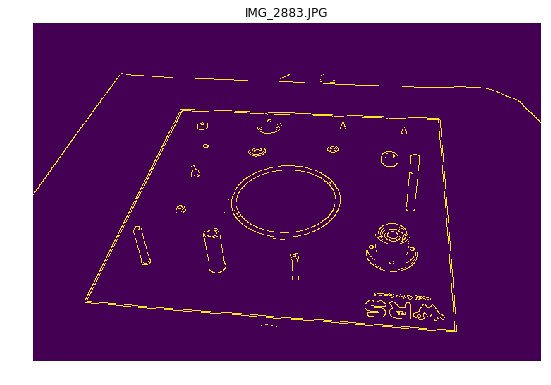

In [48]:
thresh = cv2.Canny(imgray,180,180)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh)
plt.show()

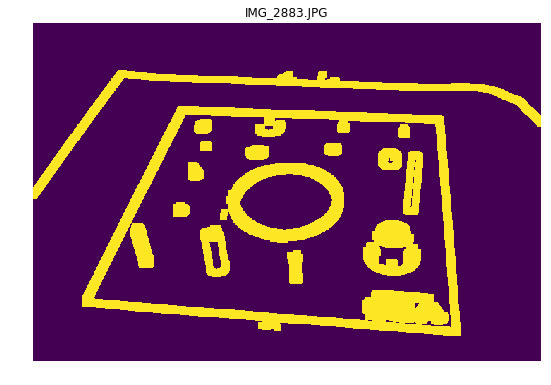

In [49]:
kernel = np.ones((10,10),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 1)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(dilation)
plt.show()

### h, b = thresh.shape

h*.6,b*.6

In [52]:
h, b = dilation.shape
faktor = 0.6

_,contours,_ = cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(blurred.shape,np.uint8)
sub_contour = [] 
for c in contours:
    if ((
        c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
        c[:,:,1].max()-c[:,:,1].min()) > h * faktor):
        
        print(len(c))    
        sub_contour.append(c)

area = (cv2.drawContours(mask, sub_contour, 0, (1,1,1), -1))

437
509


In [53]:
len(sub_contour)

2

In [54]:
area_new = cv2_clipped_zoom(area,0.96 )

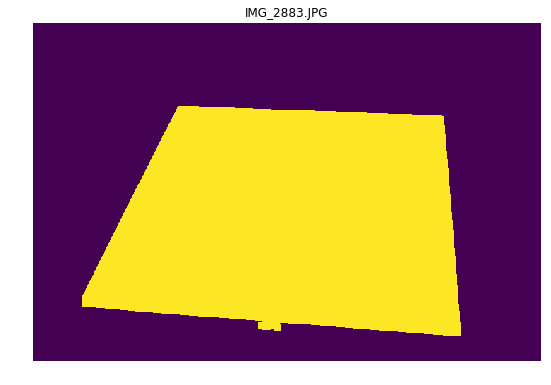

In [55]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(area[:,:,0])
plt.show()

In [56]:
area[:,:,0].sum()

139718

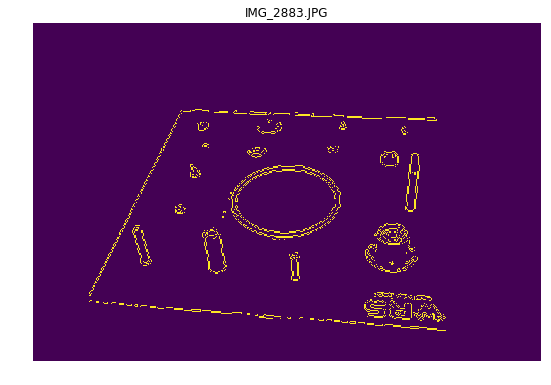

In [57]:
thresh2 = cv2.Canny(thresh*area_new[:,:,0],100,100)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh2)
plt.show()

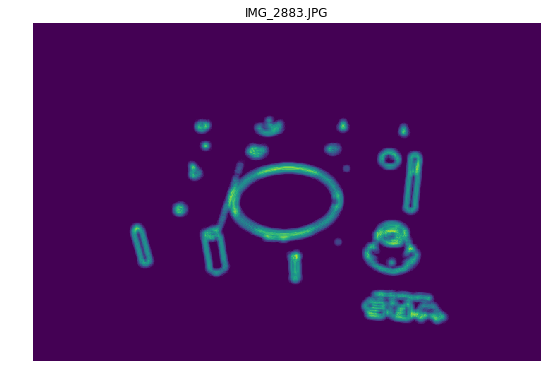

In [16]:
blurred = cv2.bilateralFilter(thresh2,10, 800, 800)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred)
plt.show()

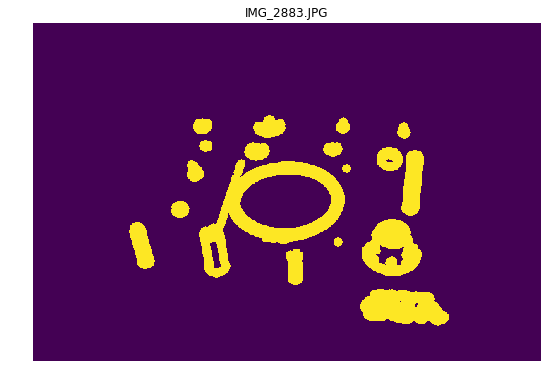

In [17]:
ret,thresh = cv2.threshold(blurred,1,25,0)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh)
plt.show()

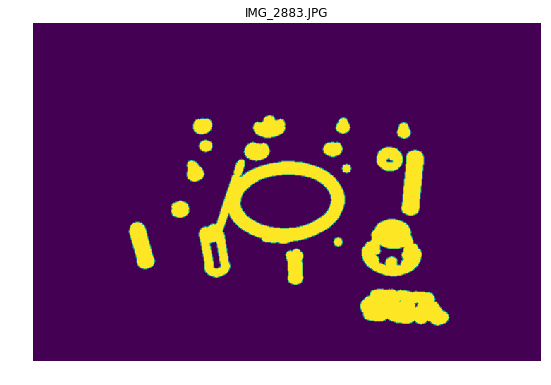

In [18]:
blurred = cv2.bilateralFilter(thresh,2, 80, 80)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred)
plt.show()

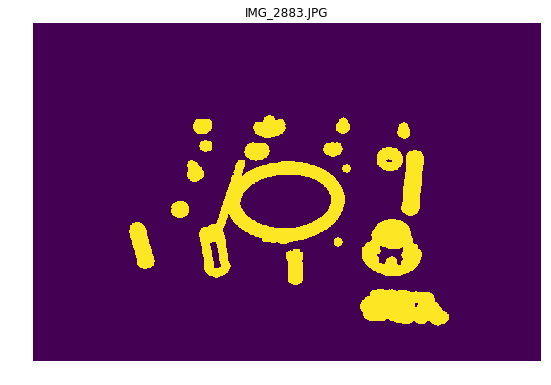

In [19]:
ret,thresh = cv2.threshold(blurred,10,25,0)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh)
plt.show()

In [20]:

sub_contour = []
_,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if len(c) < 800:
        if len(c) > 10:
            if ((c[:,:,0].max()-c[:,:,0].min()) < 300 and (c[:,:,1].max()-c[:,:,1].min()) < 300):
     #       print(len(c)    
                sub_contour.append(c)

center = []
counter = 0
for c in sub_contour:
    counter += 1
    # compute the center of the contour
    M = cv2.moments(c)
    try:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        center.append([cx , cy ])
    except:
        print('moment is zero')
        
# find near center
center = np.array(center)
counter = 0
candidats = []
for i in center:
    counter += 1

    for e,s in enumerate(np.abs(center - i)):
        dist = np.linalg.norm(s)
        if (dist < 50 and dist !=0) == True:
            candidats.append(e)
            
to_drop = []
for e,c in enumerate(sub_contour):
    for n,test in enumerate(sub_contour):
        if n!= e:
            if c[:,:,0].max() < test[:,:,0].max():
                if c[:,:,0].min()  >  test[:,:,0].min():
                    if c[:,:,1].min() > test[:,:,1].min():
                        if c[:,:,1].max() < test[:,:,1].max():
                            to_drop.append(e)

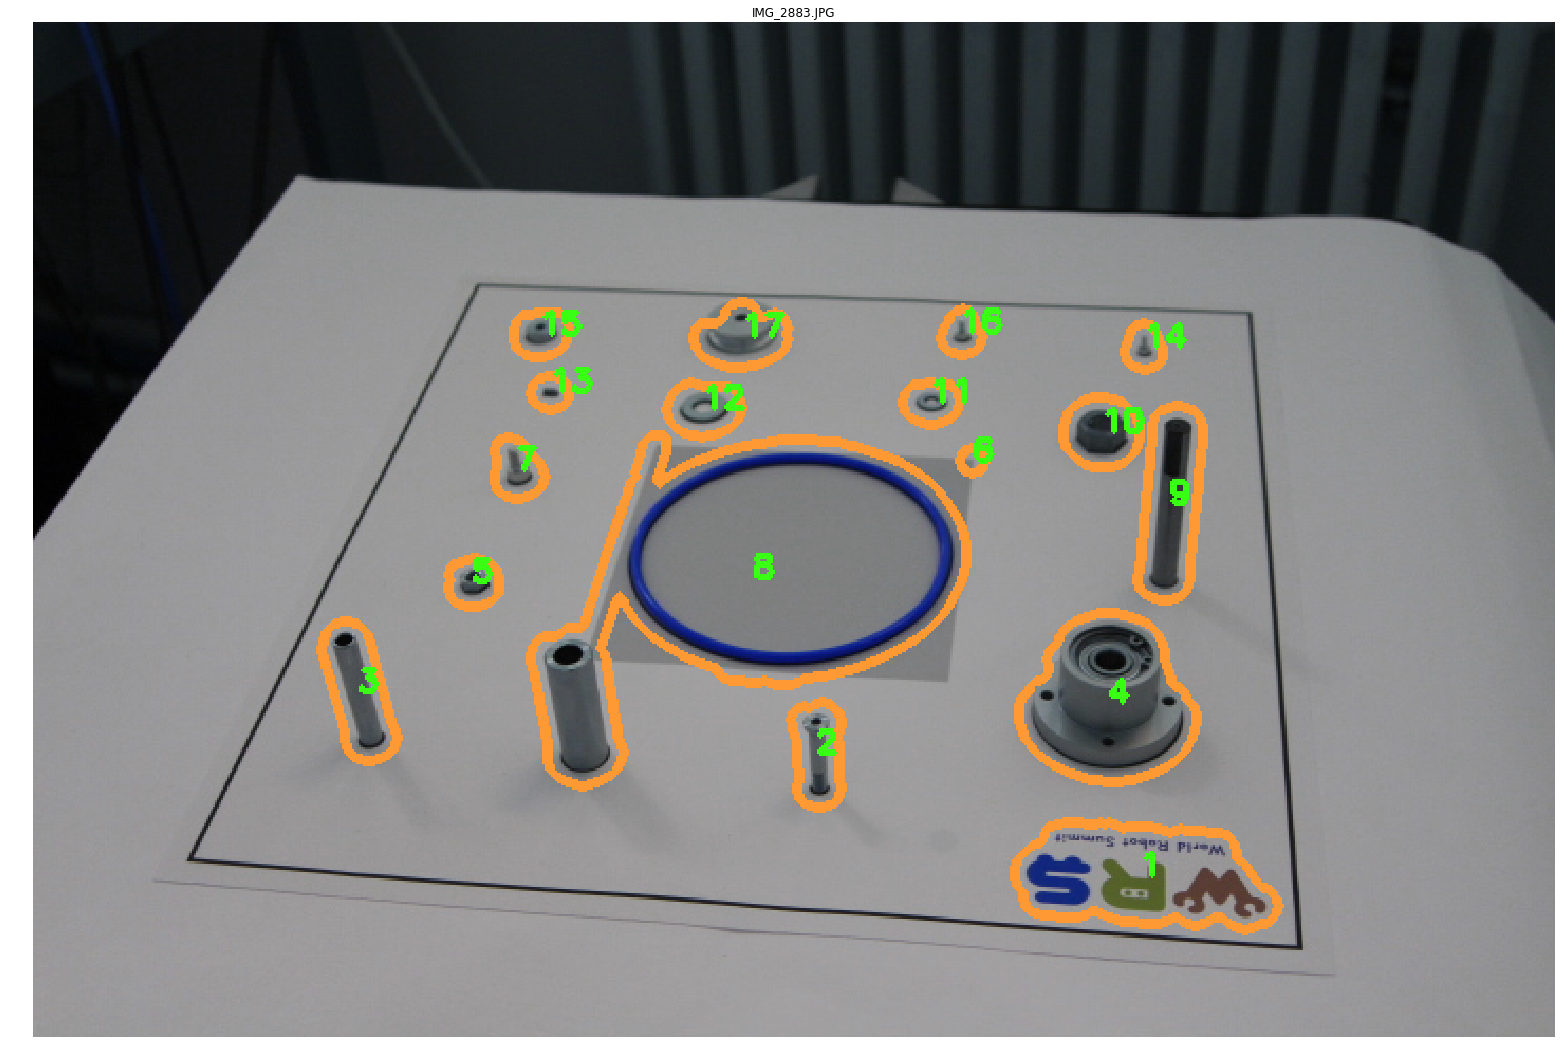

In [21]:
sub_con = np.delete(sub_contour, to_drop)
center = np.delete(center,to_drop,0)

img = cv2.drawContours(image, sub_con.tolist(), -3, (255, 153, 51), 3)

for e,ce in enumerate(center,1):
    cv2.putText(img, str(e), (ce[0] , ce[1]),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (57, 255,20), 2)

fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(img, cmap='gray');

/usr/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


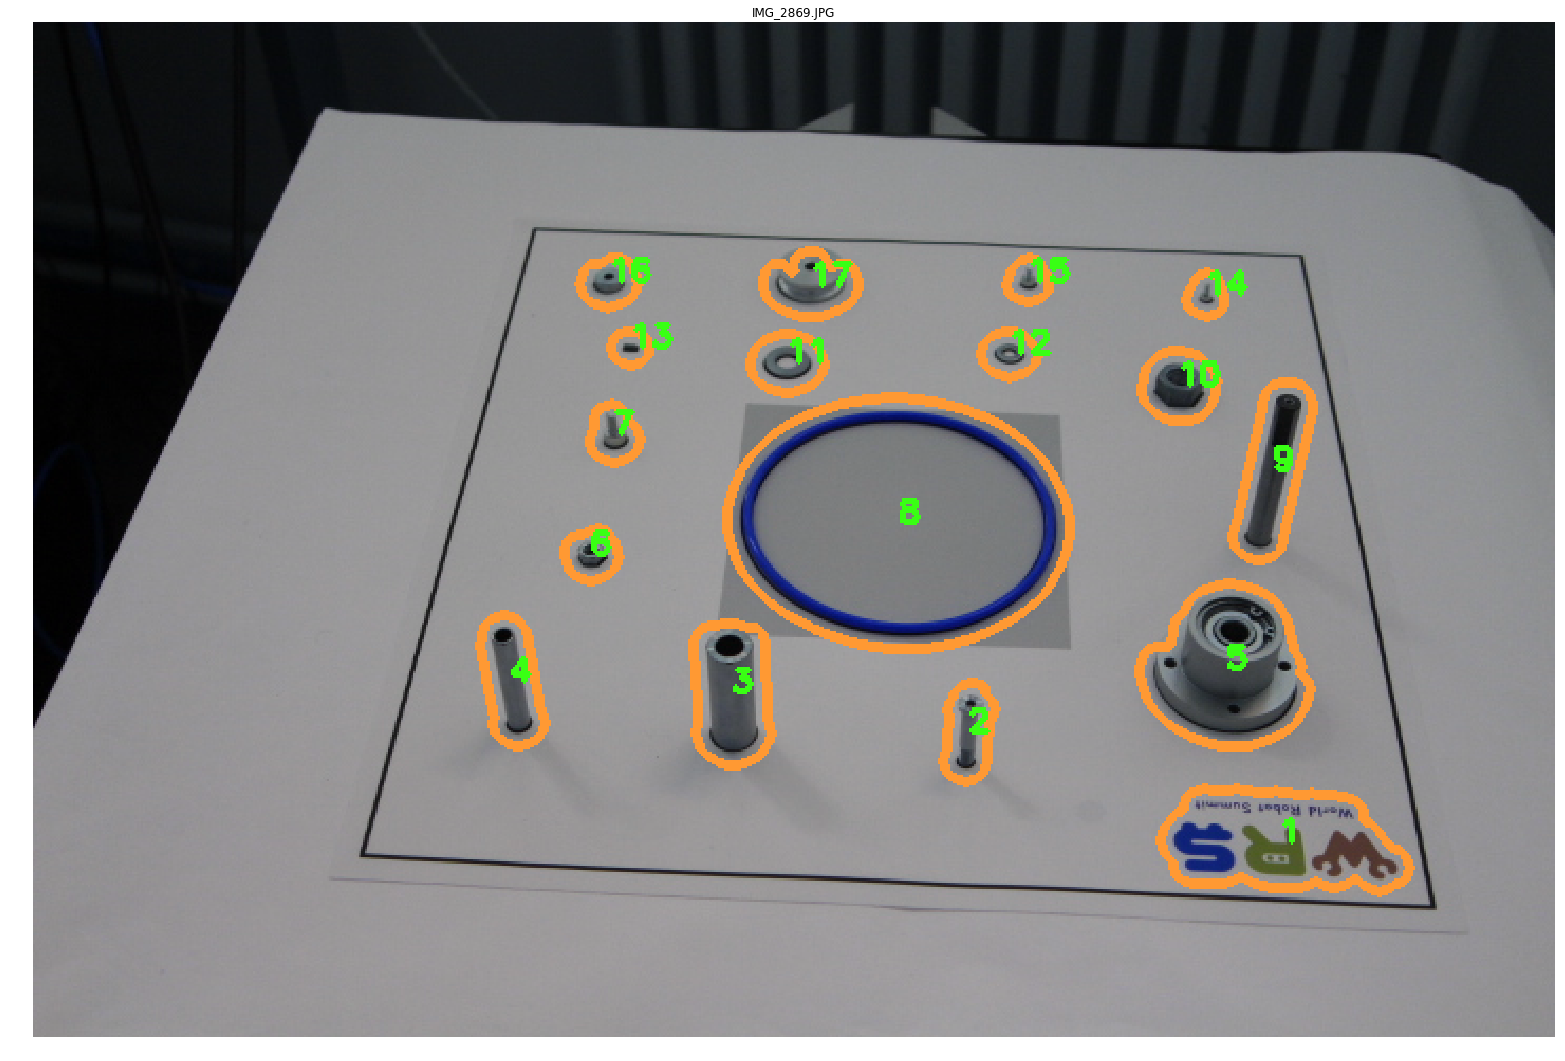

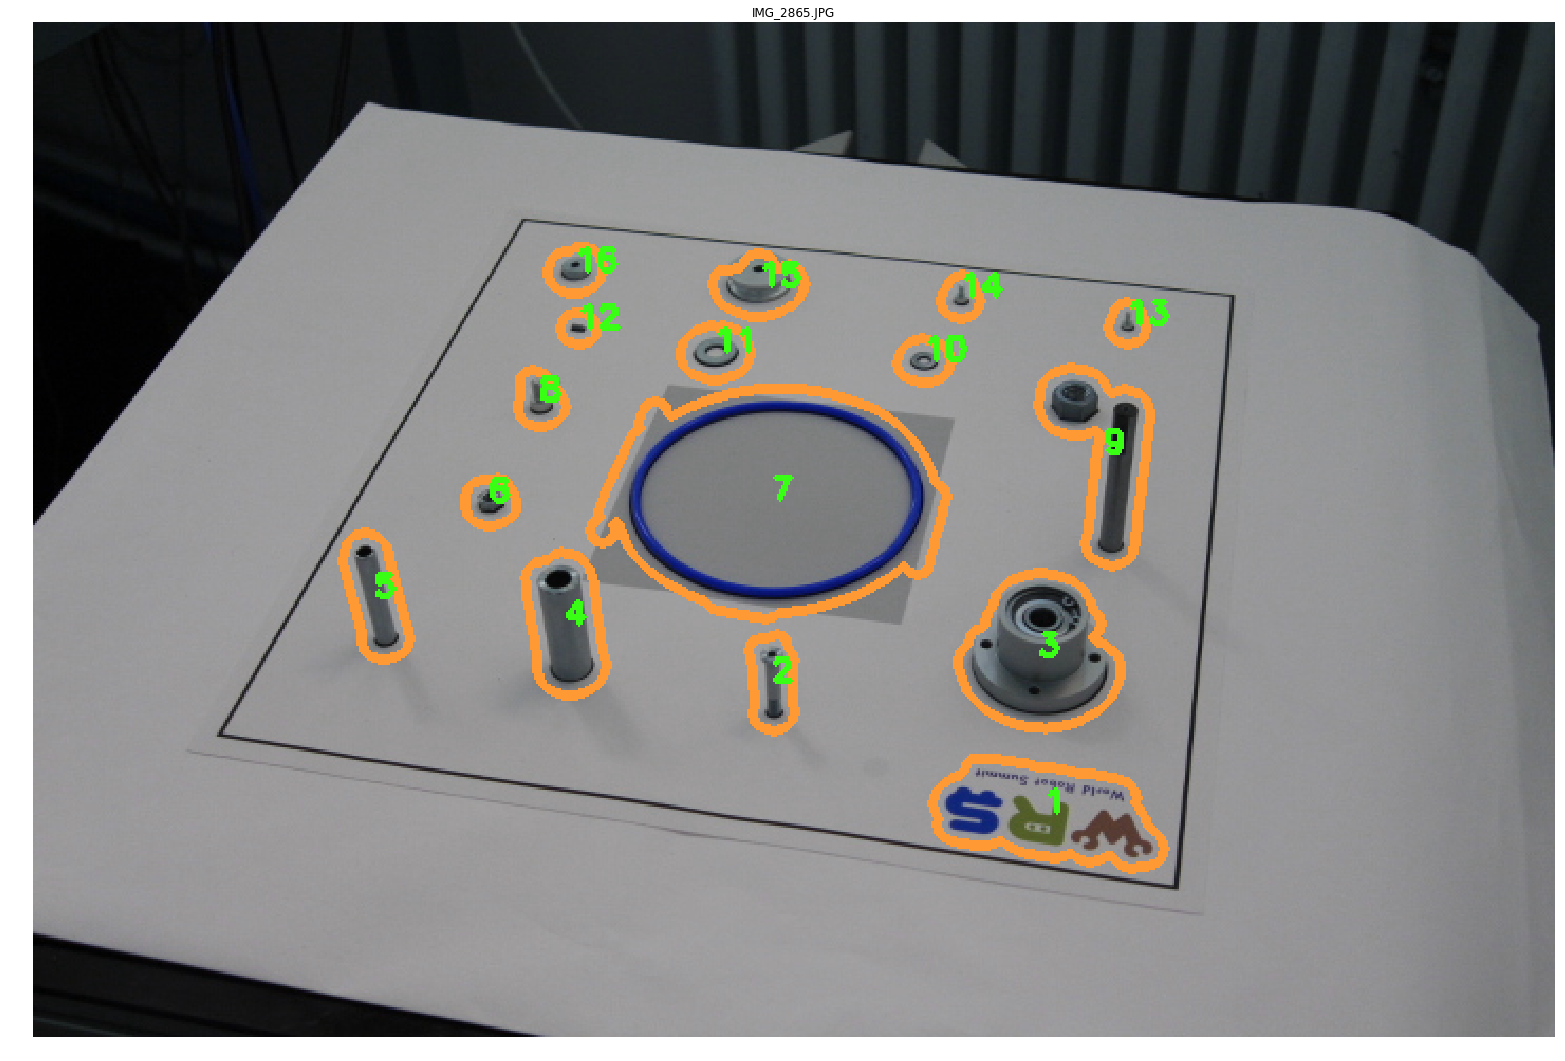

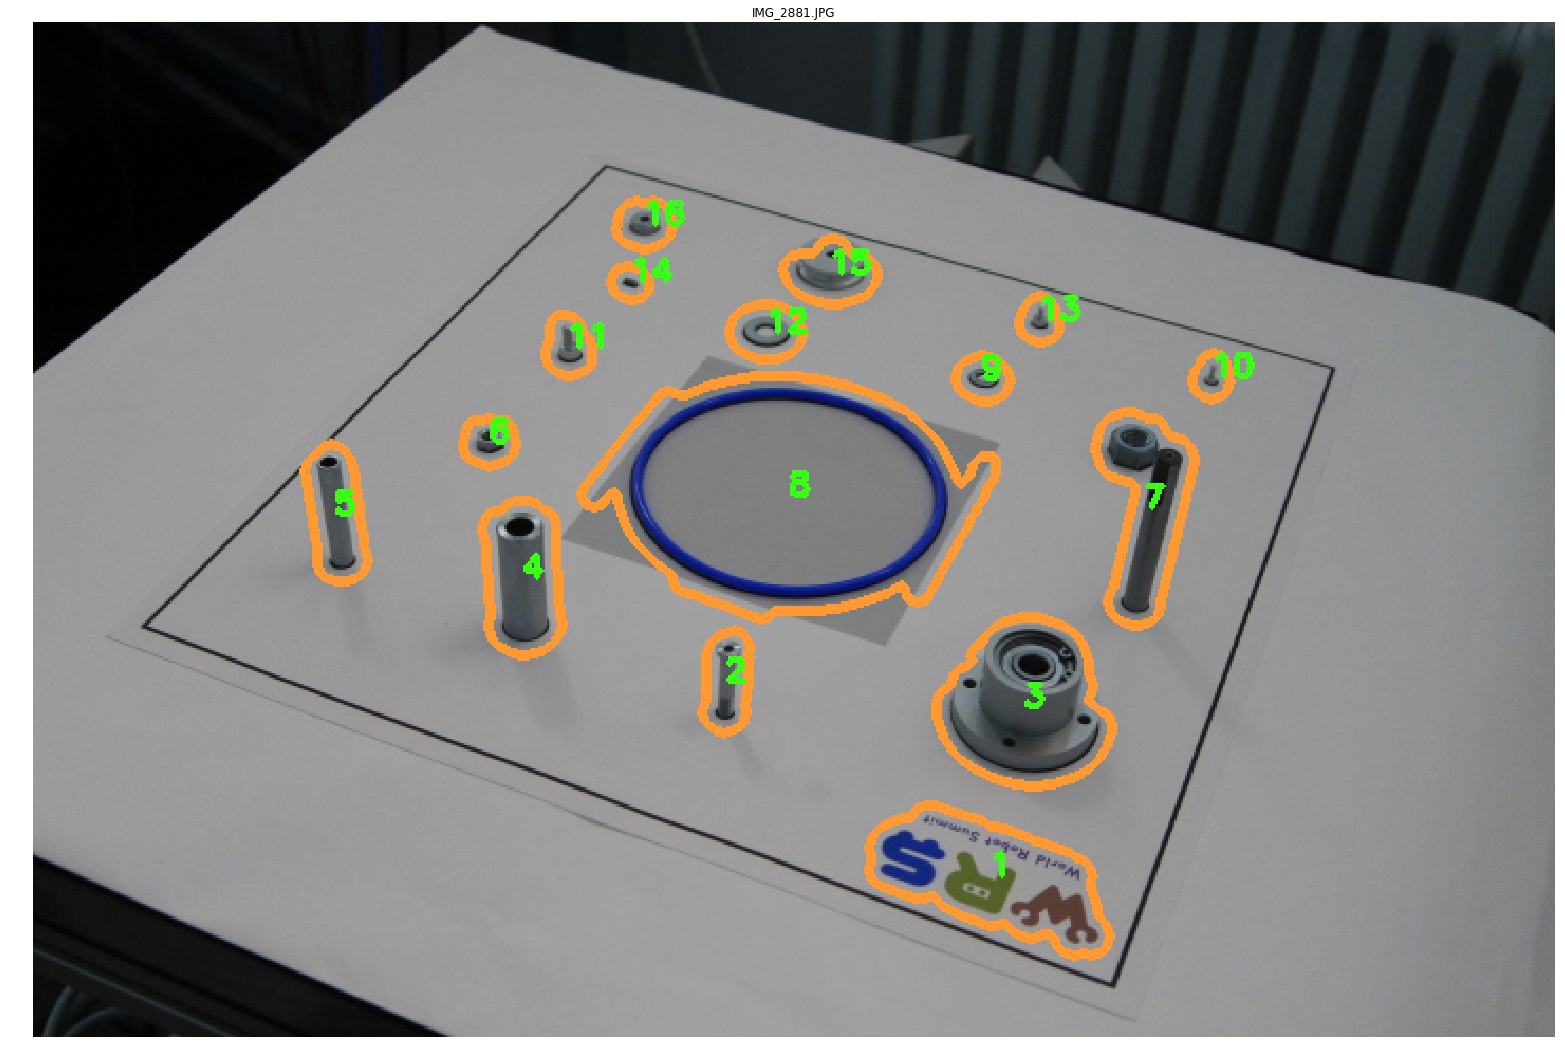

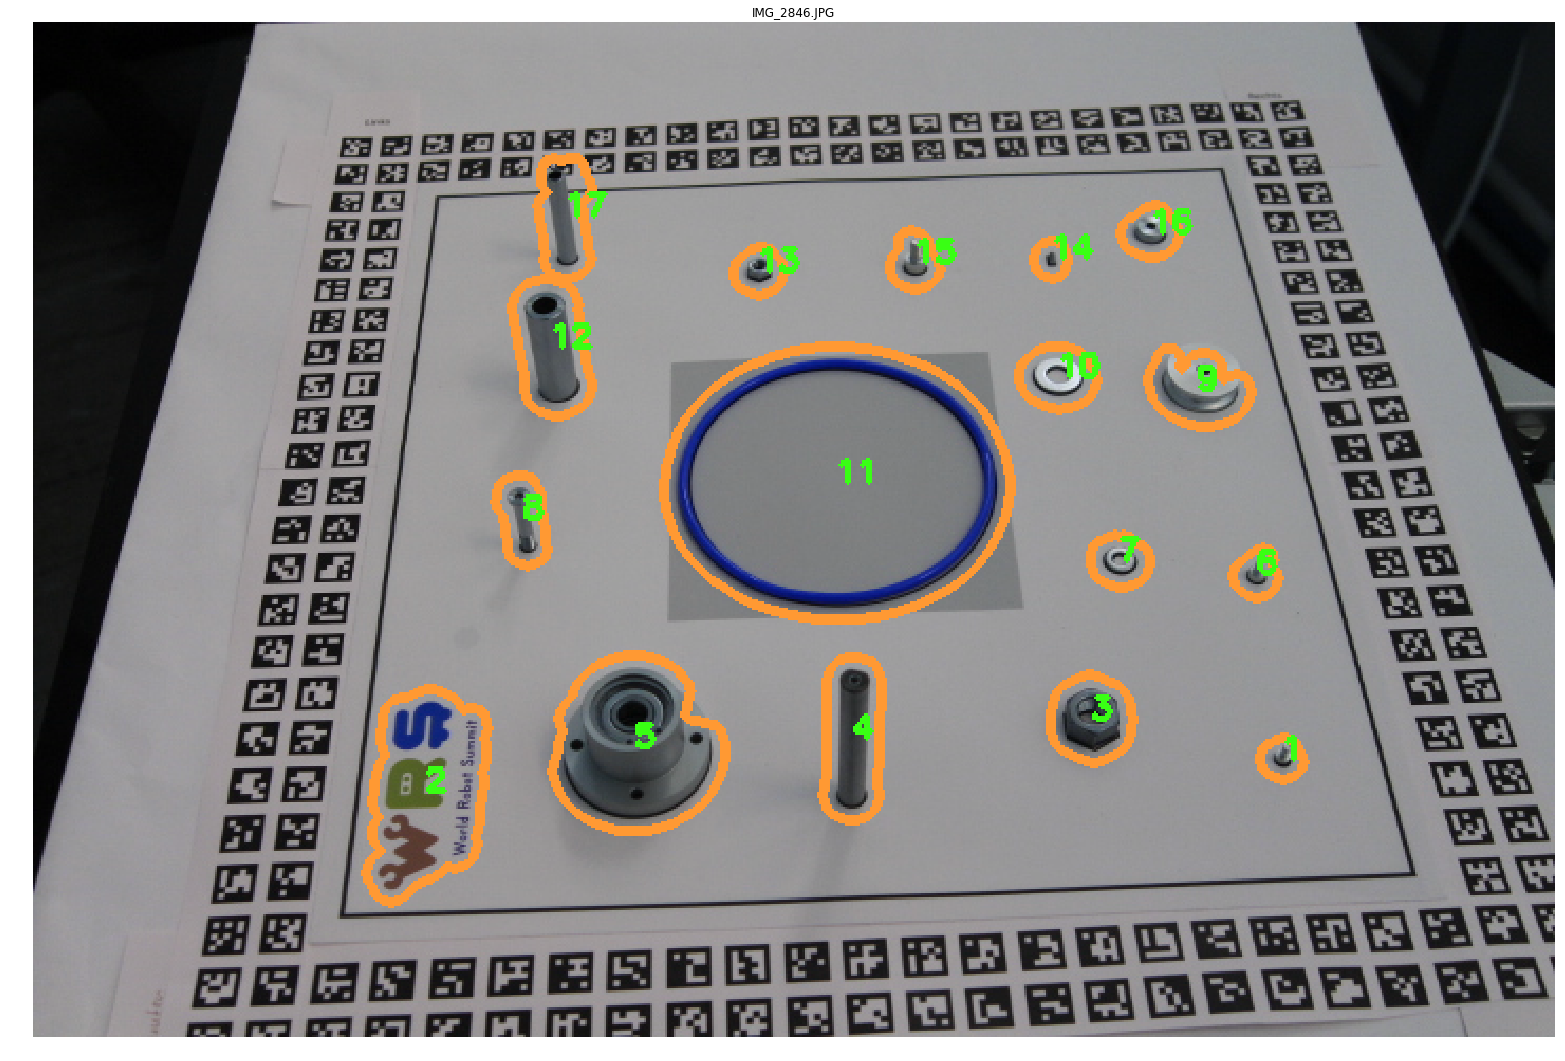

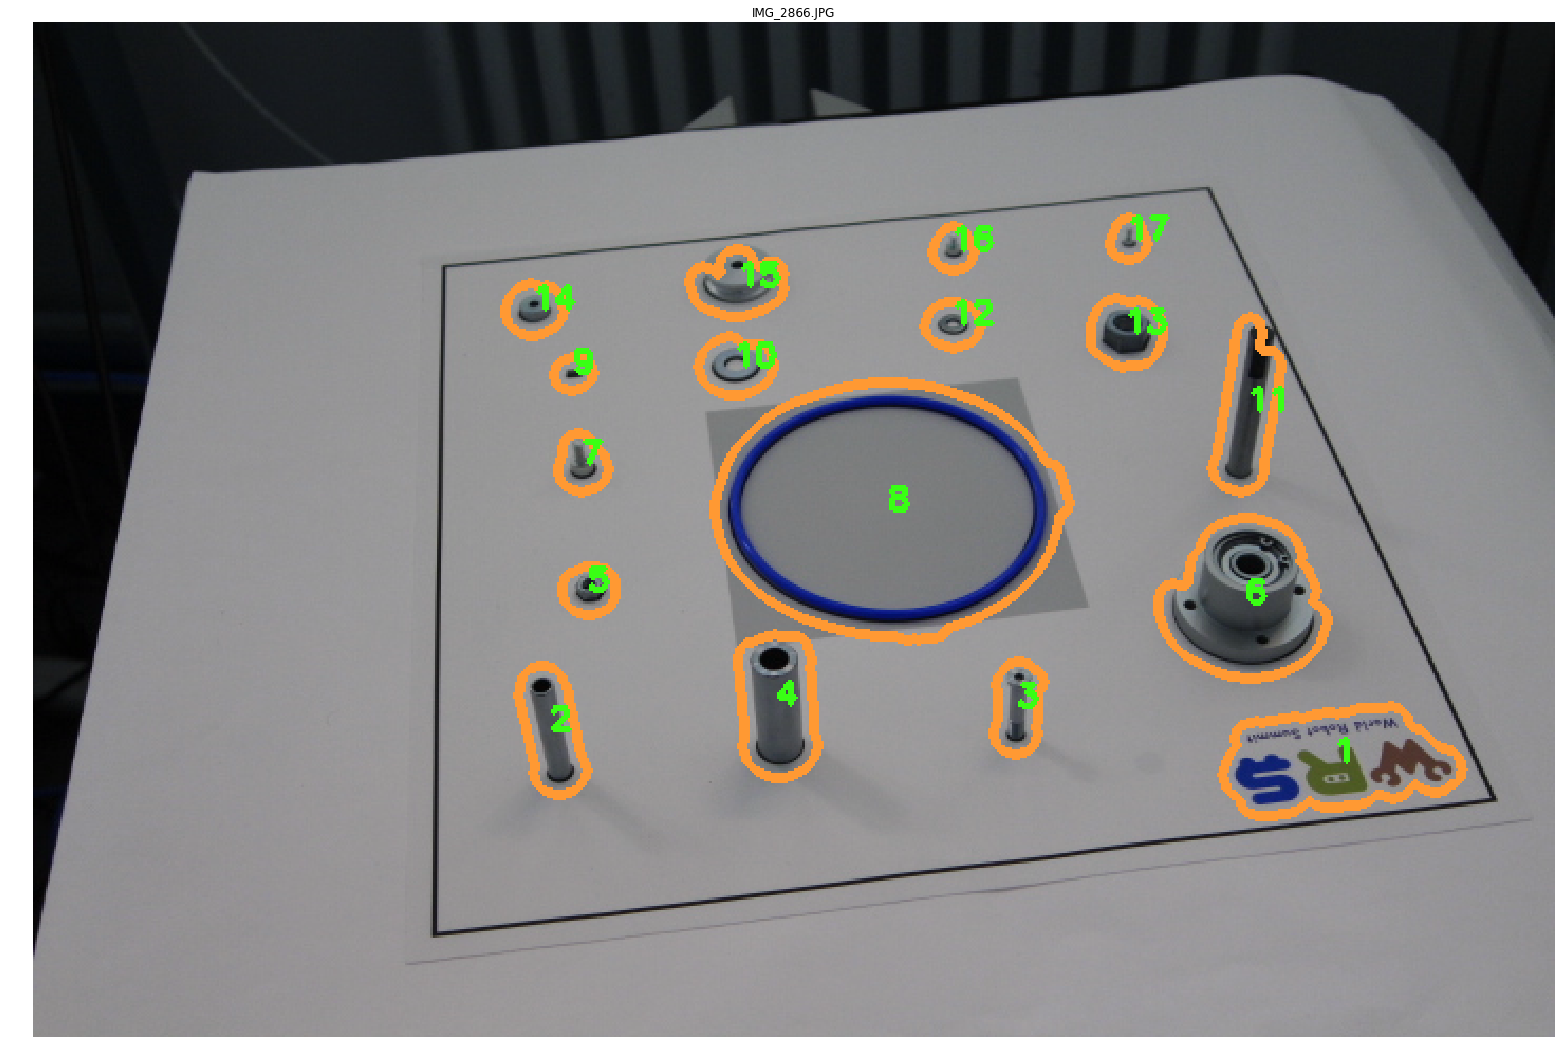

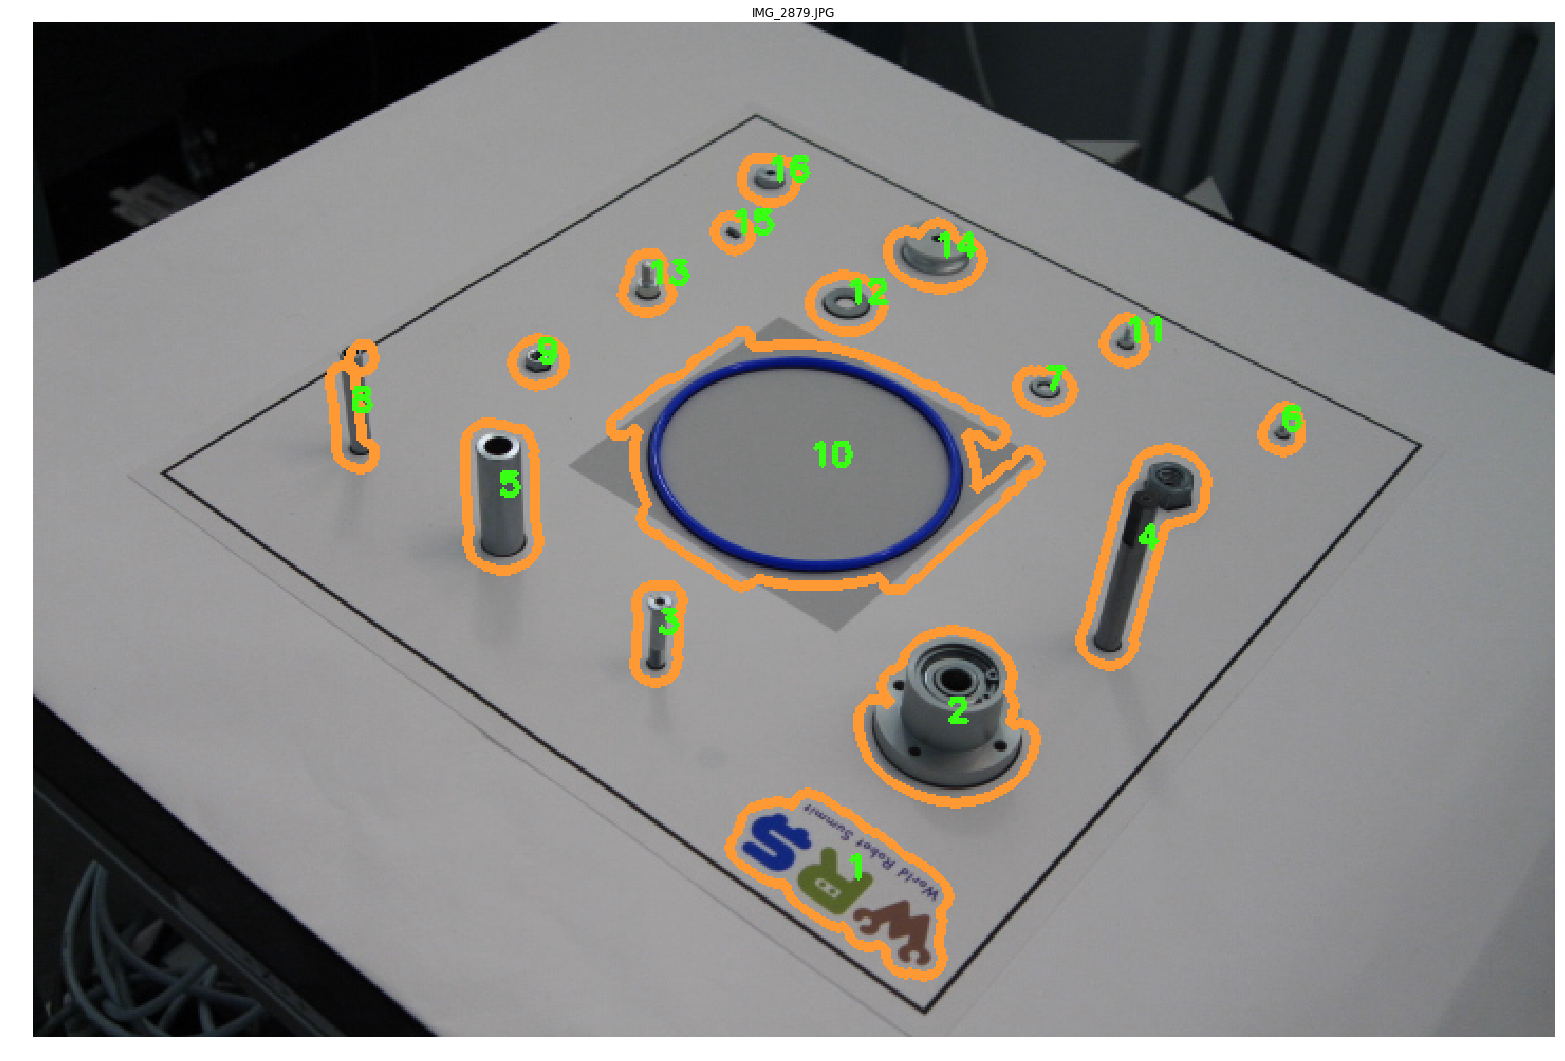

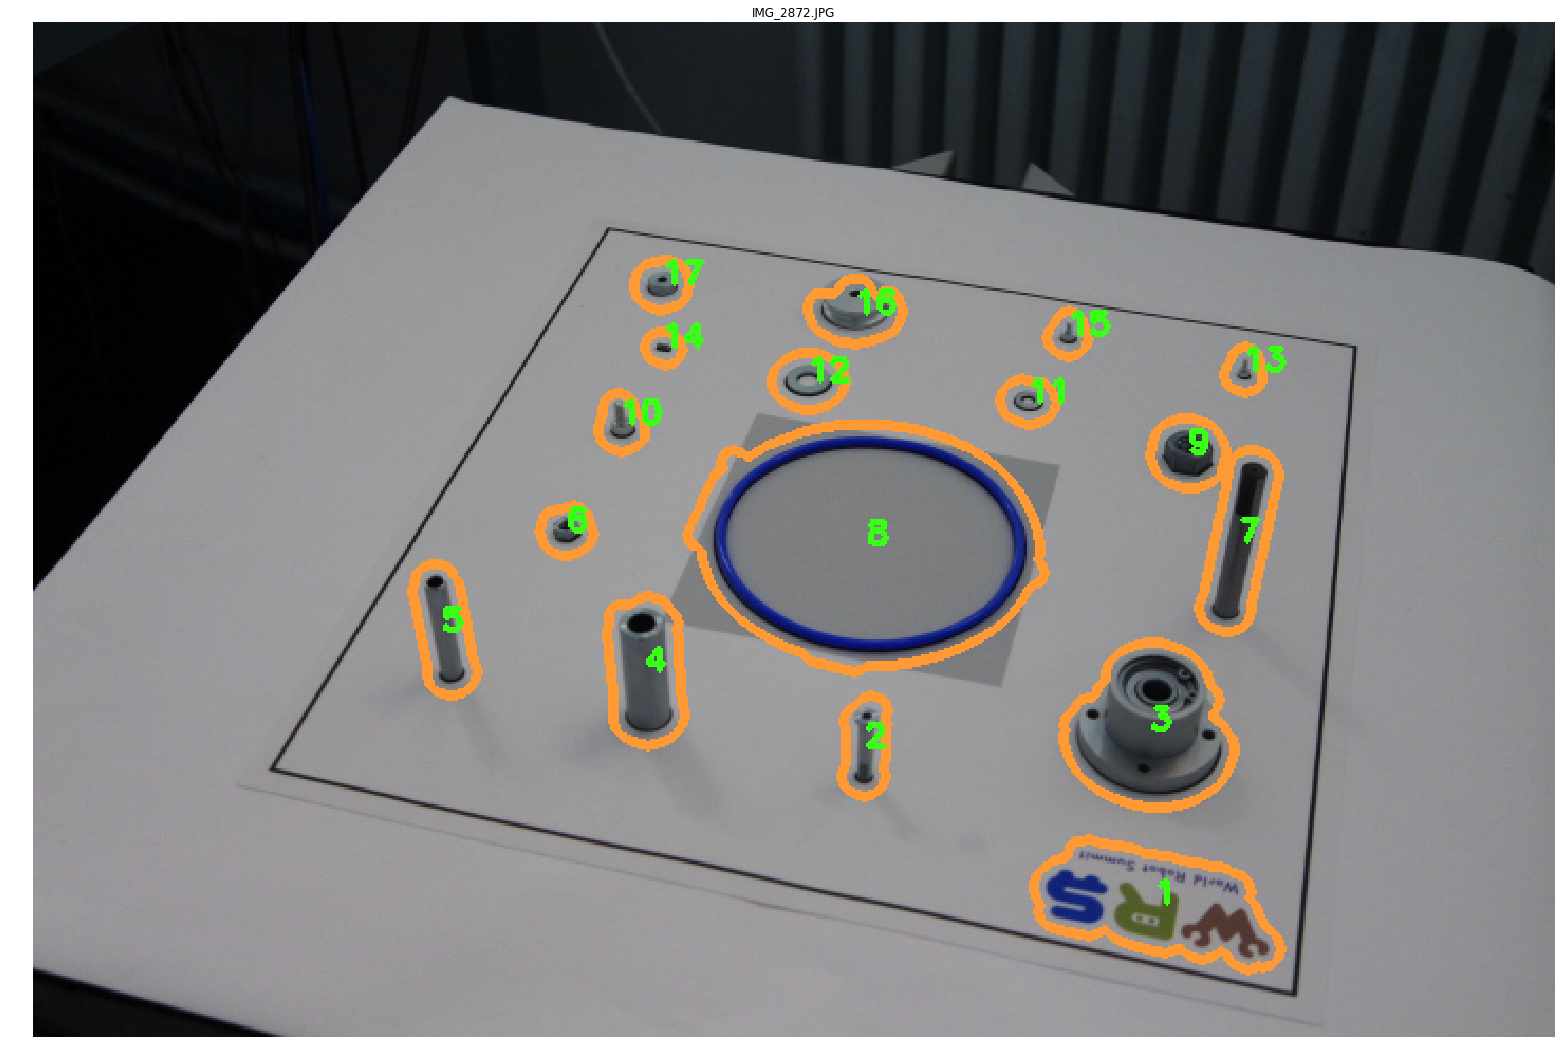

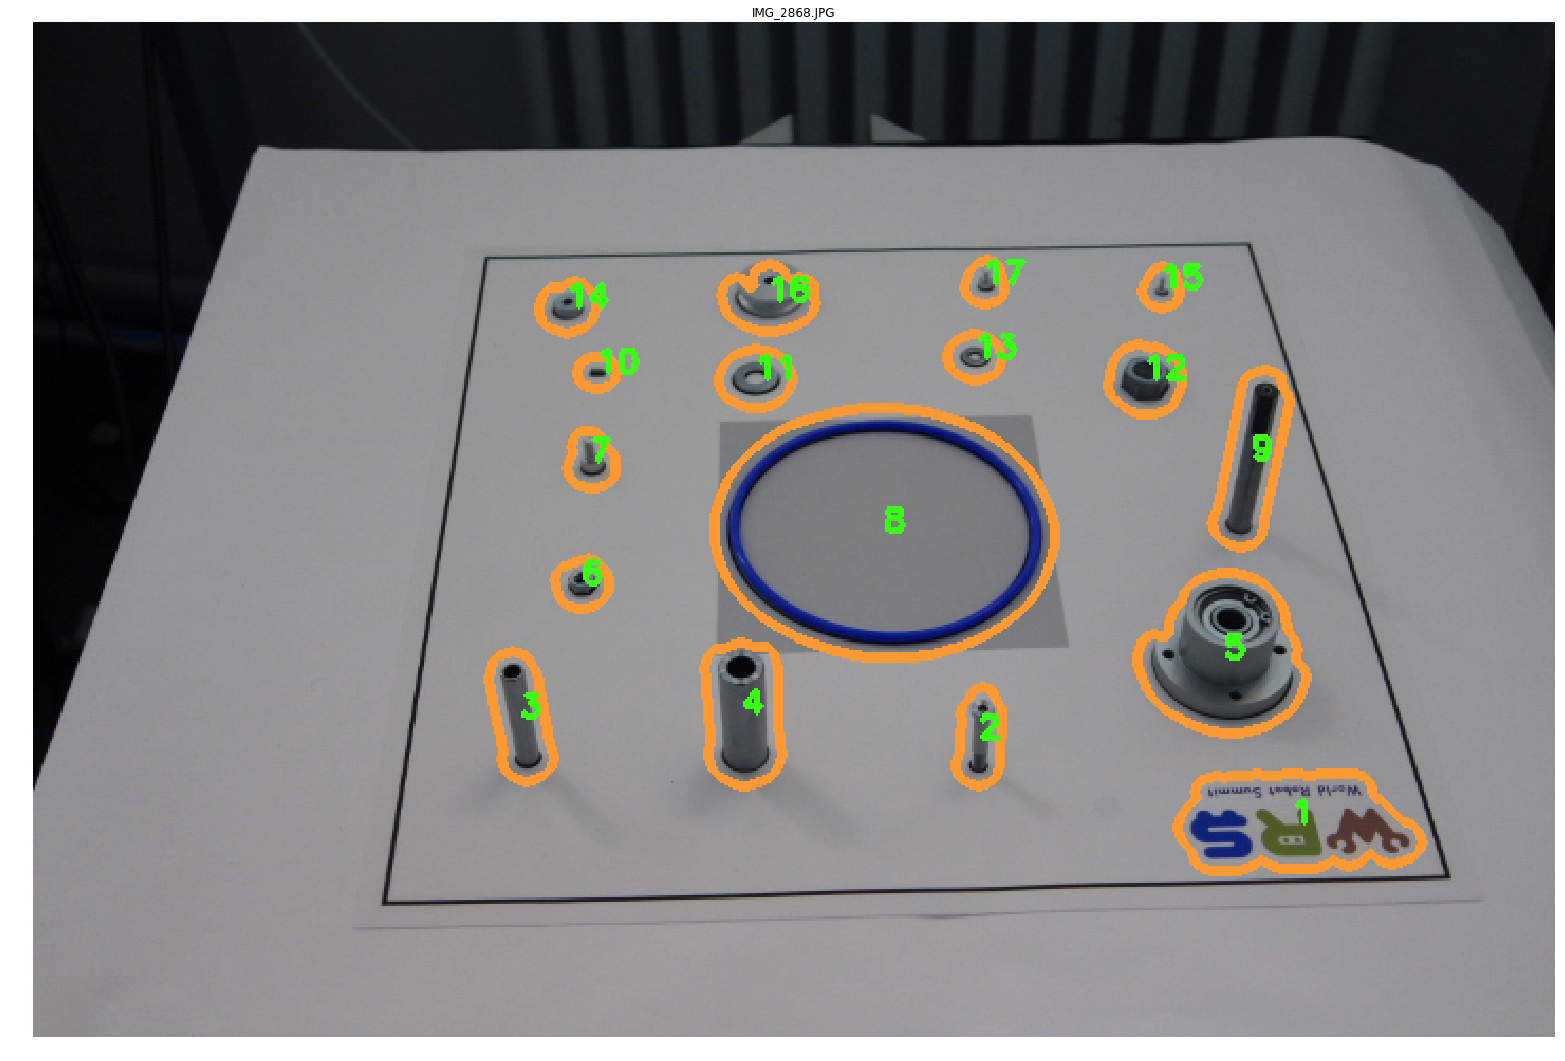

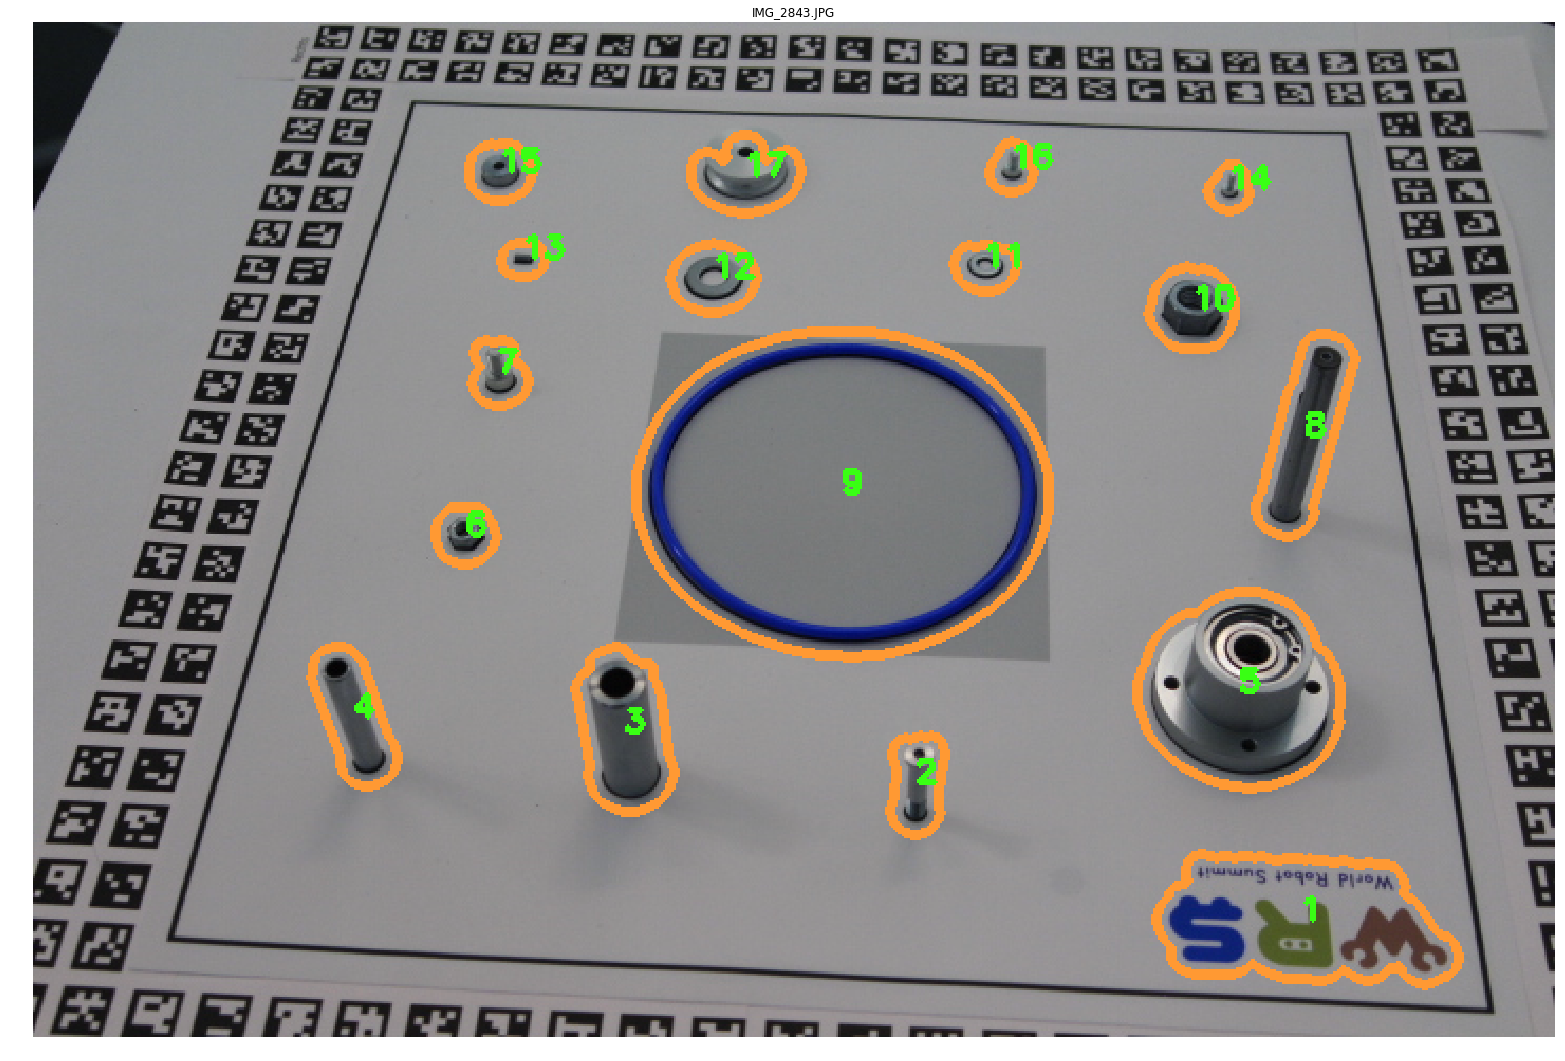

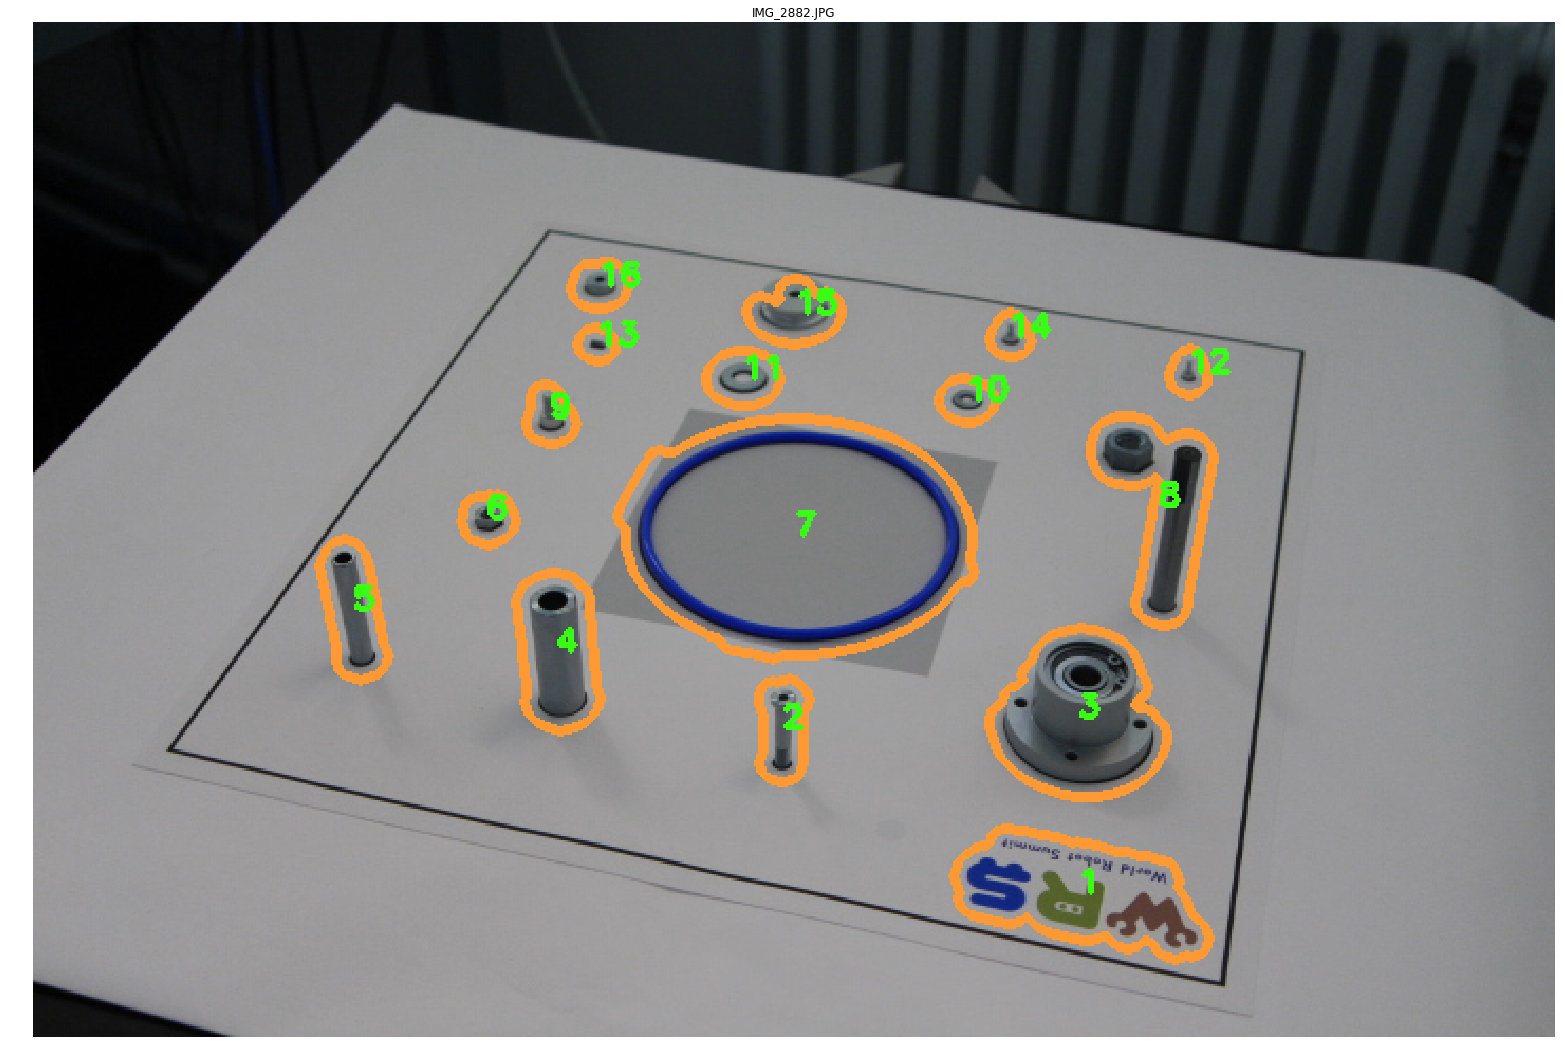

In [22]:
for image_patch in os.listdir(os.path.join(home,canon_path))[:10]:
    img_name = image_patch
    file_path = os.path.join(home,canon_path, img_name)
    image = cv2.imread(file_path)

    blurred = cv2.bilateralFilter(image,50, 10, 10)
    imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    thresh = cv2.Canny(blurred,100,100)

    h, b = thresh.shape
    faktor = 0.5

    _,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(blurred.shape,np.uint8)
    sub_contour = [] 
    for c in contours:
        if ((
            c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
            c[:,:,1].max()-c[:,:,1].min()) > h * faktor):

            #print(len(c))    
            sub_contour.append(c)

    area = (cv2.drawContours(mask, sub_contour, 0, (1,1,1), -1))
    area_new = cv2_clipped_zoom(area,0.96)
    
    thresh = cv2.Canny(blurred,200,200)
    thresh2 = cv2.Canny(thresh*area_new[:,:,0],100,100)
    blurred = cv2.bilateralFilter(thresh2,10, 800, 800)
    ret,thresh = cv2.threshold(blurred,1,25,0)
    blurred = cv2.bilateralFilter(thresh,2, 80, 80)
    ret,thresh = cv2.threshold(blurred,10,25,0)

    sub_contour = []
    _,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        if len(c) < 800:
            if len(c) > 10:
                if ((c[:,:,0].max()-c[:,:,0].min()) < 300 and (c[:,:,1].max()-c[:,:,1].min()) < 300):
         #       print(len(c)    
                    sub_contour.append(c)

    center = []
    counter = 0
    for c in sub_contour:
        counter += 1
        # compute the center of the contour
        M = cv2.moments(c)
        try:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            center.append([cx , cy ])
        except:
            print('moment is zero')

    # find near center
    center = np.array(center)
    counter = 0
    candidats = []
    for i in center:
        counter += 1

        for e,s in enumerate(np.abs(center - i)):
            dist = np.linalg.norm(s)
            if (dist < 50 and dist !=0) == True:
                candidats.append(e)

    to_drop = []
    for e,c in enumerate(sub_contour):
        for n,test in enumerate(sub_contour):
            if n!= e:
                if c[:,:,0].max() < test[:,:,0].max():
                    if c[:,:,0].min()  >  test[:,:,0].min():
                        if c[:,:,1].min() > test[:,:,1].min():
                            if c[:,:,1].max() < test[:,:,1].max():
                                to_drop.append(e)
    sub_con = np.delete(sub_contour, to_drop)
    center = np.delete(center,to_drop,0)

    img = cv2.drawContours(image, sub_con.tolist(), -3, (255, 153, 51), 3)

    for e,ce in enumerate(center,1):
        cv2.putText(img, str(e), (ce[0] , ce[1]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (57, 255,20), 2)

    fig = plt.figure(figsize=(60,60))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axis('off')
    ax1.set_title(file_path.split('/')[-1])
    ax1.imshow(img, cmap='gray')
    fig.show()